In [30]:
#import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

###### 1. Generate 10 synthetic datasets where the number of datapoints should vary from 100 to 1000 by step size 100. With 100 features in each dataset. In that 100 features 40 should be informative. Implement Linear Regression on each generated synthetic datasets and find Mean Square Error(MSE).

In [69]:
n_samples = np.linspace(100,1000,10).astype(int)                  #define list of different number of samples
n_features=100                                                    #number of features
n_informative=40                                                  #number of informative features
print(f'Number of features = {n_features}, Number of informative features = {n_informative}')
print('===========================================================')
mse = []                                                          #list for saving different mse values
#iterate over different number of samples
for n_sample in n_samples:
    #generate random regression data set the specified variables
    X, y = make_regression(n_samples=n_sample, n_features=n_features, n_informative=n_informative, random_state=1) 
    model = LinearRegression()                                   #define the model                   
    model.fit(X,y)                                               #fit the mode
    y_pred = model.predict(X)                                    #predict the values with the model
    MSE = mean_squared_error(y_pred,y)                           #calculate mean squared error
    mse.append(MSE)                                              #append mse value to the mse list
    print(f'MSE for {n_sample} samples = {MSE}')                #print mean squared error for different number of samples
    

Number of features = 100, Number of informative features = 40
MSE for 100 samples = 9.311160029328996e-25
MSE for 200 samples = 7.982609875448435e-25
MSE for 300 samples = 7.597017873010752e-25
MSE for 400 samples = 5.9805862898144445e-25
MSE for 500 samples = 6.122965175579579e-25
MSE for 600 samples = 9.209542385915682e-25
MSE for 700 samples = 1.18156263001271e-24
MSE for 800 samples = 6.290109907702022e-25
MSE for 900 samples = 7.707709888598278e-25
MSE for 1000 samples = 6.86493397978372e-25


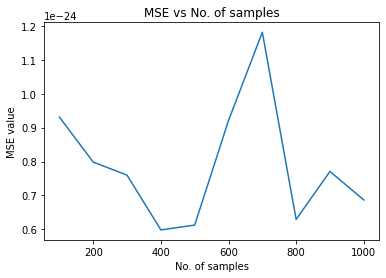

In [72]:
#plotting mse value wrt to nuber of samples
plt.plot(n_samples, mse)
plt.xlabel('No. of samples')
plt.ylabel('MSE value')
plt.title('MSE vs No. of samples')
plt.show()

###### Observations

There is no linear relation between sample size and mean squared error. That is as sample size increase mean squared error may incease or decrease

###### 2. Generate a synthetic dataset with 100 features and 1000 data points. In that 100 features 40 should be informative. Retrieve the Important features on generated synthetic dataset using Linear Regression Features Importance technique.

In [57]:
#generate random regression dataset with number pf samples=1000
#number of features=100, number of informativee features =40
X, y = make_regression(n_samples=1000, n_features=100, n_informative=40, random_state=1)

model=LinearRegression()                                      #define regression model
model.fit(X,y)                                                #fit the model
parameters = model.coef_                                      #retrieve parameters corresponding to each feature
index =[]                                                     #define an empty list for saving index of un important features

#iterate over each feature parameter
for i,coef in enumerate(parameters):
    parameter = float("{0:.5f}".format(coef))                 #define parameter as coefficient of feature upto 5 decimal points
    #print('Feature: {}, Score: {}'.format(i,score))  
   
    #if absolute value of parameter equelto zero, append index of feature to index list
    if abs(parameter)==0:
        index.append(i)

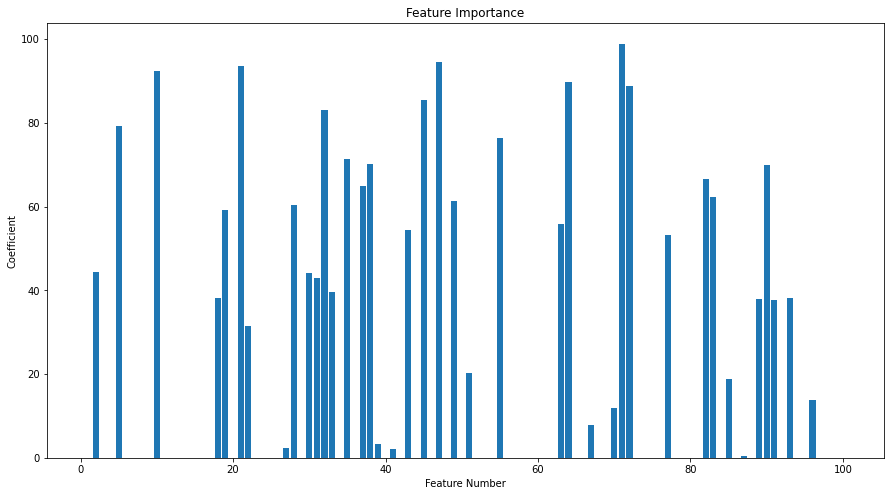

In [58]:
#plot feature importance as barplot
features = np.linspace(1,100,100).astype(int)
plt.figure(figsize=(15,8))
plt.bar(features,parameters)
plt.xlabel('Feature Number')
plt.ylabel('Coefficient')
plt.title('Feature Importance')
plt.show()
plt.close()

In [59]:
#print indices of un important features
print('Indices of un important features:')
print(index)

Indices of un important features:
[0, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 19, 22, 23, 24, 25, 28, 33, 35, 39, 41, 43, 45, 47, 49, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 64, 65, 67, 68, 72, 73, 74, 75, 77, 78, 79, 80, 83, 85, 87, 91, 93, 94, 96, 97, 98, 99]


In [61]:
#remove all un important features and define array of important features
X_imp = np.delete(X,index,axis=1)
X.shape,X_imp.shape, y.shape

((1000, 100), (1000, 40), (1000,))

###### a. Linear Regression

In [62]:
model = LinearRegression()                                #define linear regression model
model.fit(X_imp,y)                                        #fit the model
y_pred = model.predict(X_imp)                             #predict y values
MSE = mean_squared_error(y, y_pred)                       #calculate mse
print('Mse for Linear regression: {}'.format(MSE))       

Mse for Linear regression: 3.8952243221523305e-25


###### b. Ridge Regression

In [63]:
model = Ridge()                                          #define ridge regression model
model.fit(X_imp,y)                                       #fit the model
y_pred = model.predict(X_imp)                            #predict y                       
MSE = mean_squared_error(y, y_pred)                      #calculate mse 
print('Mse for Ridge regression: {}'.format(MSE))

Mse for Ridge regression: 0.15088215007770836


###### c. Lasso Regression

In [64]:
model = Lasso()                                         #define lasso regression model
model.fit(X_imp,y)                                      #fit the model
y_pred = model.predict(X_imp)                           #predict y
MSE = mean_squared_error(y, y_pred)                     #calculate mse
print('Mse for Lasso regression: {}'.format(MSE))

Mse for Lasso regression: 42.42028668780959


###### Observations

Mean squared error values is less for linear regression and more for lasso regression model. It implies linear regression model overfit.

###### 3. Generate 10 synthetic datasets with 1000 data points and 100 features where the number of informative features should vary from 10 to 100 by step size 10. mplement Linear Regression on each generated synthetic datasets and find Mean Square Error(MSE).


In [73]:
n_informative = np.linspace(10,100,10).astype(int)              #define a list of different N_informative values
n_samples=1000
n_features=100
print(f'Number of samples = {n_samples}, Number of features = {n_features}')
print('===========================================================')
mse = []                                                        #list for saving different mse values

#iterate over different n_informative values
for n_info in n_informative:
    #generate random regression dataset with specified variables
    X, y = make_regression(n_samples=n_samples, n_features=n_features, n_informative=n_info, random_state=1)
    model = LinearRegression()                           #define linear regression model
    model.fit(X,y)                                       #fit the model
    y_pred = model.predict(X)                            #predict y values with model
    MSE = mean_squared_error(y_pred,y)                   #calculate mse
    mse.append(MSE)
    print(f'MSE for {n_info} informative features = {MSE}')  #print mse for different n_informative values
    

Number of samples = 1000, Number of features = 100
MSE for 10 informative features = 1.9738629000368921e-25
MSE for 20 informative features = 4.929399091812023e-25
MSE for 30 informative features = 3.1751166073682646e-25
MSE for 40 informative features = 6.86493397978372e-25
MSE for 50 informative features = 9.310261769193439e-25
MSE for 60 informative features = 1.5801006867660336e-24
MSE for 70 informative features = 1.285285242405644e-24
MSE for 80 informative features = 1.6673556101495635e-24
MSE for 90 informative features = 4.86749233967869e-24
MSE for 100 informative features = 3.689543745853895e-24


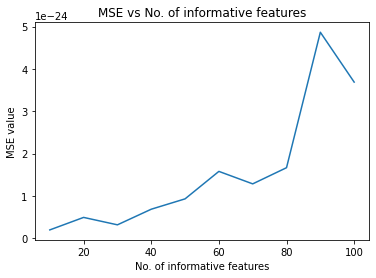

In [74]:
#plotting mse value wrt to nuber of samples
plt.plot(n_informative, mse)
plt.xlabel('No. of informative features')
plt.ylabel('MSE value')
plt.title('MSE vs No. of informative features')
plt.show()

###### Observations

As number of informative feature increase mean squared error may increase but not linear.
Mean squared error is lower for low value of number of informative features.